# Manipulating Time Series Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Working with Time Series in Pandas

In [2]:
# Create the range of dates
seven_days = pd.date_range(start='2020-1-1', periods=7)

for day in seven_days:
    print(day.dayofweek, day.day_name())

2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday
0 Monday
1 Tuesday


### Time series of air quality data

In [3]:
data = pd.read_csv('data/air_quality/nyc.csv')
print(data.head(), '\n')
print(data.info(), '\n')

# Convert the date column to datetime
data.date = pd.to_datetime(data.date)
# Set date column as index
data.set_index('date', inplace=True)

print(data.info())

         date     ozone       pm25        co
0  1999-07-01  0.012024  20.000000  1.300686
1  1999-07-02  0.027699  23.900000  0.958194
2  1999-07-03  0.043969  36.700000  1.194444
3  1999-07-04  0.035162  39.000000  1.081548
4  1999-07-05  0.038359  28.171429  0.939583 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


In [4]:
# setting plot defatult size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


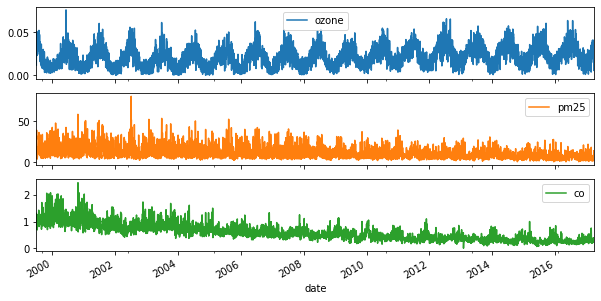

In [5]:
# Plot data
data.plot(subplots=True)
plt.show()

### Compare annual stock price trends

In [6]:
yahoo = pd.read_csv('data/stock/yahoo.csv')
print(yahoo.info(), '\n')

yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)

y2013 = yahoo.loc['2013', ['price']]
print(y2013.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
date     782 non-null object
price    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB
None 

            price
date             
2013-01-02  20.08
2013-01-03  19.78
2013-01-04  19.86
2013-01-07  19.40
2013-01-08  19.66


In [7]:
# Select data for each year and concatenate with prices
prices = pd.DataFrame()
for year in ['2013', '2014', '2015']:
    # 해당 연도 데이터만 추출
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    # 컬럼명을 연도로 변경
    price_per_year.rename(columns={'price': year}, inplace=True)
    # 데이터 합치기
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


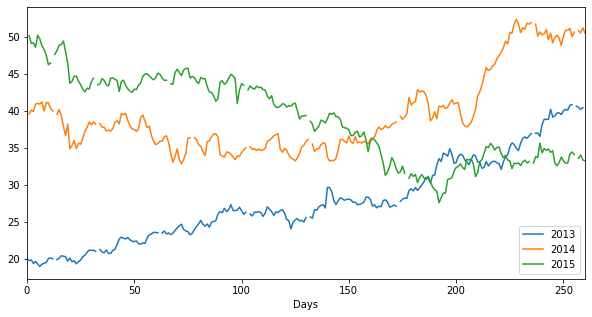

In [8]:
# Plot prices
prices.plot()
plt.xlabel('Days')
plt.show()

### Set and change time series frequency

In [9]:
co = pd.read_csv('data/air_quality/co_cities.csv')
co.date = pd.to_datetime(co.date)
co.set_index('date', inplace=True)

print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


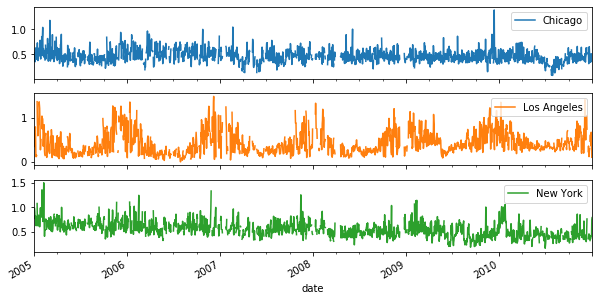

In [10]:
# set the frequency to calendar daily
co = co.asfreq('D')

co.plot(subplots=True)
plt.show()

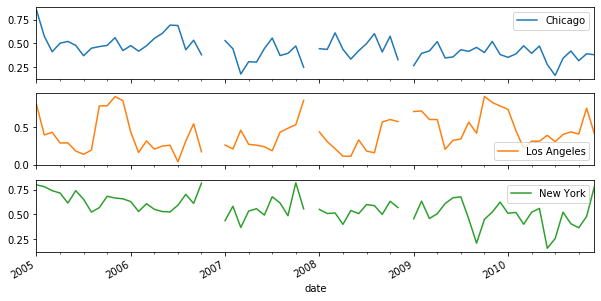

In [11]:
# Set frequency to monthly
co = co.asfreq('M')

co.plot(subplots=True)
plt.show()

### Shifting stock prices across time

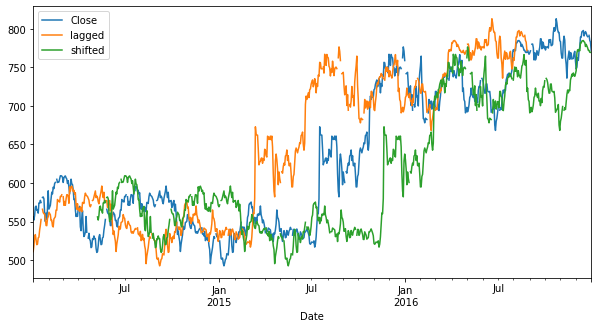

In [12]:
google = pd.read_csv('data/stock/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

In [13]:
# Calculating stock price changes

# Created shifted_30
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail(), '\n')

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64 

0.0    703
dtype: int64


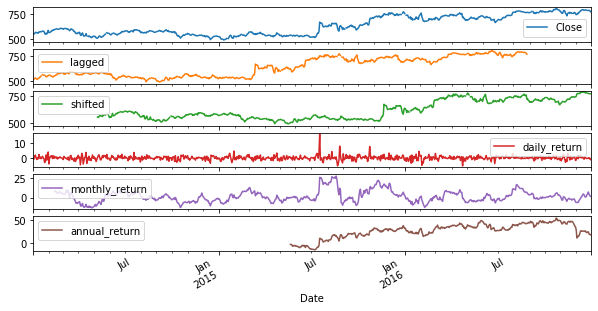

In [14]:
# Plotting multi-period returns

google['daily_return'] = google.Close.pct_change().mul(100)

google['monthly_return'] = google.Close.pct_change(30).mul(100)

google['annual_return'] = google.Close.pct_change(360).mul(100)

google.plot(subplots=True)
plt.show()

## 2. Basic Time Series Metrics & Resampling

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB


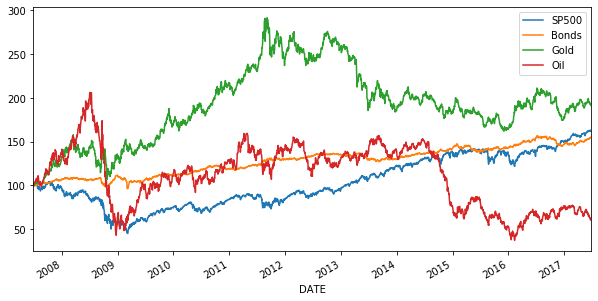

In [15]:
# Compare the performance of several asset classes

prices = pd.read_csv('data/stock/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

prices.info()

# Select first prices
first_prices = prices.iloc[0]

# Create normalized_prices
# first_prices로 모든 price를 나누고 100을 곱함. 즉 기준가 = 100.
normalized = prices.div(first_prices).mul(100)

normalized.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


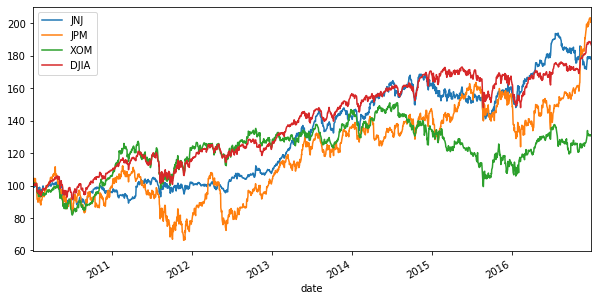

In [16]:
# Comparing stock prices with a benchmark

# Company             Stock Ticker
# Johnson & Johnson   JNJ
# Exxon Mobil         XOM
# JP Morgan Chase     JPM

stocks = pd.read_csv('data/stock/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('data/stock/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot data
data.div(data.iloc[0]).mul(100).plot()
plt.show()

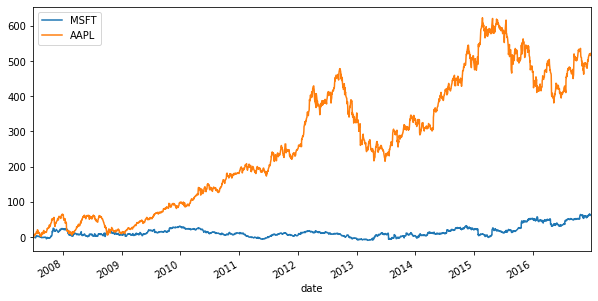

In [17]:
# Microsoft 와 Apple 주가 비교 - SP500으로 normalize

tickers = ['MSFT', 'AAPL']

stocks = pd.read_csv('data/stock/msft_aapl.csv', parse_dates=['date'], index_col='date')
sp500 = pd.read_csv('data/stock/sp500.csv', parse_dates=['date'], index_col='date')

data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Changing the time series frequency: resampling

In [18]:
# Convert monthly to weekly data

start = '2016-1-1'
end = '2016-2-29'

# Create monthly
monthly_dates = pd.date_range(start=start, end=end, freq='M')
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly, '\n')

# Create weekly_dates
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates), '\n')
print(monthly.reindex(weekly_dates, method='bfill'), '\n')   # backward fill the missing values
print(monthly.reindex(weekly_dates, method='ffill'), '\n')   # forward fill the missing values

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64 

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64 

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64 

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64 



            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           NaN
2010-01-10       NaN           NaN
2010-01-17       NaN           NaN
2010-01-24       NaN           NaN
2010-01-31       NaN           NaN
            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           9.8
2010-01-10       NaN           9.8
2010-01-17       NaN           9.8
2010-01-24       NaN           9.8
2010-01-31       NaN           9.8
            Debt/GDP  Unemployment
date                              
2010-01-03  87.00386           9.8
2010-01-10  87.00386           9.8
2010-01-17  87.00386           9.8
2010-01-24  87.00386           9.8
2010-01-31  87.00386           9.8


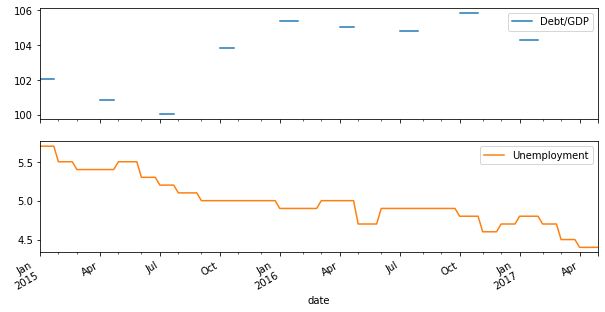

In [19]:
# Create weekly from monthly unemployment data

data = pd.read_csv('data/stock/debt_unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015
weekly_ffill.loc['2015':].plot(subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None 

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07',
               ...
               '2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01'],
              dtype='datetime64[ns]', length=366, freq='W-SUN') 



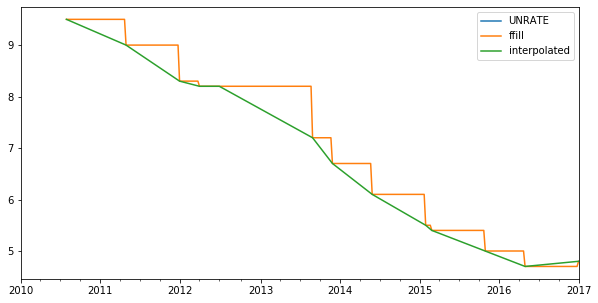

In [20]:
# Upsampling : Use interpolation to create weekly employment data

monthly = pd.read_csv('data/stock/unrate.csv', parse_dates=['DATE'], index_col='DATE')
print(monthly.info(), '\n')

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')
print(weekly_dates, '\n')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


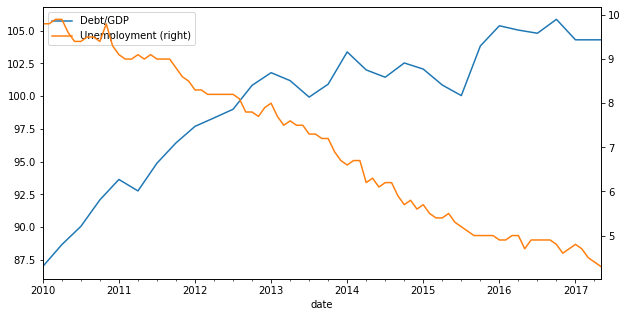

In [21]:
# Interpolate debt/GDP and compare to unemployment

data = pd.read_csv('data/stock/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB


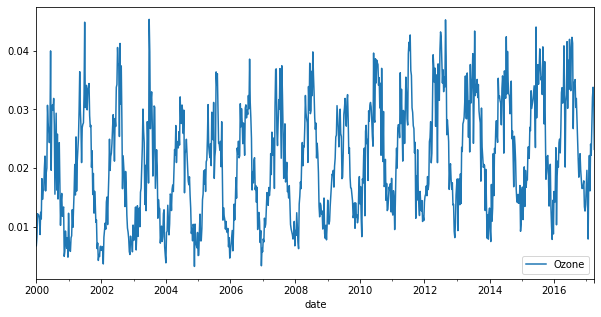

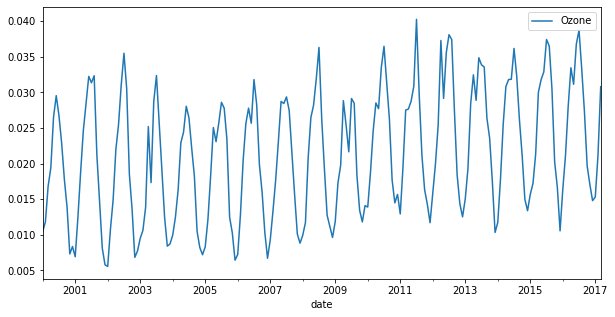

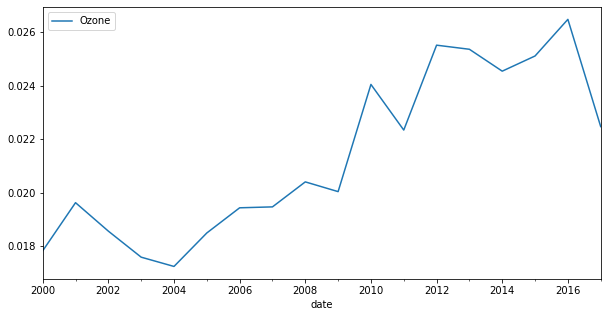

In [22]:
# Downsampling & aggregation

# Compare weekly, monthly and annual ozone trends for NYC & LA
ozone = pd.read_csv('data/air_quality/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot();
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot();
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot();
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


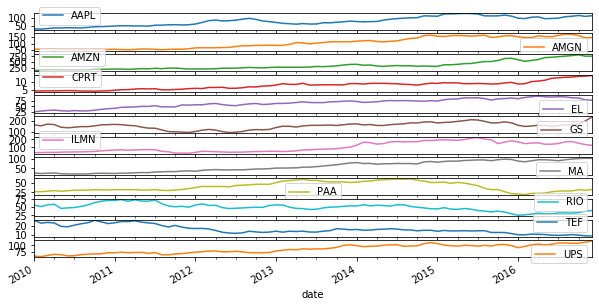

In [23]:
# Compare monthly average stock prices for Facebook and Google

stocks = pd.read_csv('data/stock/stock_data.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None 



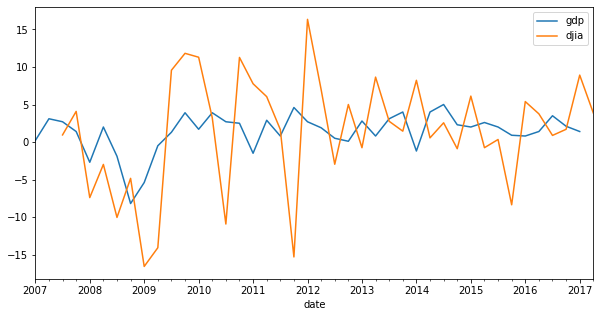

In [24]:
# Compare quarterly GDP growth rate and stock returns

gdp_growth = pd.read_csv('data/stock/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info(), '\n')

djia = pd.read_csv('data/stock/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info(), '\n')

# Calculate djia quarterly returns : daily --> quarterly
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

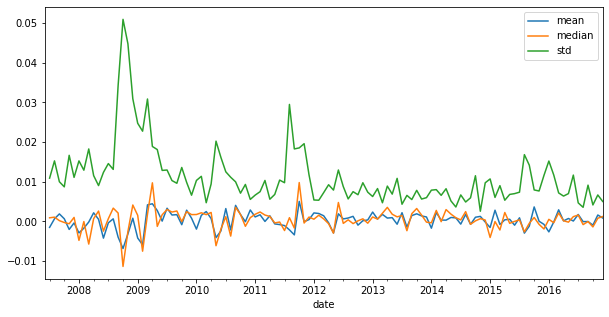

In [25]:
# Visualize monthly mean, median and standard deviation of S&P500 returns

sp500 = pd.read_csv('data/stock/sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

stats.plot()
plt.show()